The general Language Understanding benchmark (Glue) is a suite of ressources, machine learning and AI oriented tasks, that can be used to deepen the understanding of those concepts.Those task are mainly used to test and improve the performance of models,represented by a ranking that classifies the performance of each model by its accuracy score. 

In this notebook we work on the stanford Sentiment Treebank (SST), a dataset that regroup ~668000 movie review mostly from rotten tomatoes. For each review we have the sentiment symbolized by 0 for a negatives review and 1 for a positive one.

In order to train a model that will predict the sentiment from each review in the dataset, we first need to transform the data into a form that will be understandable by our models, this is where text vectorization will come into play. We will transform the reviews sentences into numerical representations.
In this segment, I will use two text vectorization methods in order to compare and contrast them. Finally, I will discuss the third method and critically analyze the results.  

### Bag of Words

The first text vectorization method I will apply is bag of words.
First of some context, as mentioned previously Machine learning models can't work with raw text data, we need to convert the text into numbers, this process is called feature extraction, one way to do it is thought the bag of words representation.

The bag of words representation of a text is the vocabulary of the words present in that text and the occurence of each words. As the name suggest bag refers to the fact that the structure of the words in the text is not preserved 

We start of by setting up our libraries and paths for the data.  

In [4]:
import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [5]:
train_df_path = r"C:\Users\imade\Desktop\AE2\Fondations of data science\SST-2\train.tsv"
dev_df_path = r"C:\Users\imade\Desktop\AE2\Fondations of data science\SST-2\dev.tsv"
test_df_path = r"C:\Users\imade\Desktop\AE2\Fondations of data science\SST-2\test.tsv"

We load the datasets

In [89]:
train = pd.read_csv(train_df_path, sep = '\t')
train.fillna(-999)
dev = pd.read_csv(dev_df_path, sep = '\t')
dev.fillna(-999)
test = pd.read_csv(test_df_path, sep = '\t')


Lets first have a look on our data. We can see that data went through some preprossesing.

In [90]:
test

,index,sentence
0,0,uneasy mishmash of styles and genres .
1,1,this film 's relationship to actual tension is...
2,2,"by the end of no such thing the audience , lik..."
3,3,director rob marshall went out gunning to make...
4,4,lathan and diggs have considerable personal ch...
...,...,...
1816,1816,"it risks seeming slow and pretentious , becaus..."
1817,1817,take care of my cat offers a refreshingly diff...
1818,1818,davis has filled out his cast with appealing f...
1819,1819,it represents better-than-average movie-making...


- It is contains only english reviews
- all the text is in lower case
- there is a space between punctuations.
- Each row represents a review in the sentence column and and sentiment behind it in the label column. 

This is the dataset that we will use to train our models,assuming that the labeling is accurate.

Now that we loaded up the training datasets, the next step to pass it through a vectorizer to get its bag of words representation, but first we need to parameter our vectorizer. 

After some round of testing I noticed that the features extracted contain numeric values, they might be relevant to another machine learning model, but I don't think it's the case for a sentiment analysis, and it does lower the efficiency of our model on top of taking memory. 
I will start set up a method that uses a regular expression to create a text preprocessor that will then be passed to the text vectorizer

In [21]:
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

We will start by splitting our data 80 % for training 20% for testing, this is the data that will be used throughout the notebook

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train.sentence, train.label,
                                                          test_size = 0.20, random_state=123456789)

We first need to set up the parameter for the vectorizer, on of them is filtering the stop words,they are most common words in any language but are not really helpfull for our analysis. 

In [29]:
#We start by loading up the module from the library
from sklearn.feature_extraction.text import CountVectorizer


#we create the parameter for vectorizer. 
CountVec = CountVectorizer(preprocessor=preprocess_text)
X = CountVec.fit_transform(X)

Here we are using unigrams and bigrams, the reason is to give more context for bag of words. It just mean that we will have single token or tokens with 2 words.

The next step is to transform our data using the Vectorizer parameter, we will first use fit() for generating a learning model parameters of the training data and those parameters will be used to generate a transformed dataset with the transform() method, fit_transfrom() is a mix of those 2 methods 

In [63]:
#we transform our dataset

count_data = CountVec.fit_transform(x_train)
#We store the words and their frequency in a dictionary so we can have a better idea of our data. 
vocab = CountVec.vocabulary_.items()
#we also store the features
features = CountVec.get_feature_names()



We create a dataframe using our data

In [95]:
#We create a dataframe with the bag of word representation for each review
bag_df=pd.DataFrame(count_data.toarray(),columns=CountVec.get_feature_names())
bag_df['Review'] = x_train.values
bag_df.set_index("Review", inplace=True)

Lets now have a look at the results. 

In [93]:
features

['abandon',
 'ability',
 'able',
 'abroad',
 'absolute',
 'absolutely',
 'absorbing',
 'abstract',
 'absurd',
 'absurdities',
 'absurdity',
 'absurdly',
 'abuse',
 'academy',
 'accent',
 'accents',
 'accept',
 'accept world',
 'acceptable',
 'access',
 'accessible',
 'accident',
 'acclaim',
 'accomplish',
 'accomplished',
 'account',
 'accurate',
 'accurately',
 'ache',
 'achieve',
 'achievement',
 'achievements',
 'achieves',
 'achieving',
 'achingly',
 'act',
 'acted',
 'acting',
 'acting chops',
 'acting clinic',
 'acting like',
 'acting poorly',
 'action',
 'action comedy',
 'action film',
 'action films',
 'action flick',
 'action hero',
 'action movie',
 'action packed',
 'action scenes',
 'action sequences',
 'actor',
 'actor stoop',
 'actors',
 'actress',
 'actresses',
 'acts',
 'acts kindness',
 'actual',
 'actually',
 'adam',
 'adam sandler',
 'adaptation',
 'add',
 'added',
 'addition',
 'adds',
 'adequate',
 'admirable',
 'admire',
 'admission',
 'admit',
 'admittedly',
 'a

In [86]:
import collections
CountVec.vocabulary_.values()

sorted_x = sorted(CountVec.vocabulary_.items(), key=lambda kv: kv[1], reverse=True)[:300]

scatter_dict = collections.OrderedDict(sorted_x)
scatter_dict

OrderedDict([('zone', 4999),
             ('zombie', 4998),
             ('zero', 4997),
             ('zany', 4996),
             ('youthful', 4995),
             ('younger', 4994),
             ('young women', 4993),
             ('young woman', 4992),
             ('young talent', 4991),
             ('young men', 4990),
             ('young', 4989),
             ('york city', 4988),
             ('york', 4987),
             ('yiddish theater', 4986),
             ('yiddish', 4985),
             ('yesterday', 4984),
             ('yes', 4983),
             ('years ago', 4982),
             ('years', 4981),
             ('yearning', 4980),
             ('year old', 4979),
             ('year best', 4978),
             ('year', 4977),
             ('yarn', 4976),
             ('ya ya', 4975),
             ('ya sisterhood', 4974),
             ('ya', 4973),
             ('wry humor', 4972),
             ('wry', 4971),
             ('wrought', 4970),
             ('wrong moments', 4969)

### Limitation of bag of words

Bag of word is one of the easiest text vectorization model to implement and to understand, it can successfully solve some basic classification problems, like labeling documents. Nevertheless it suffer from shortcoming

- The major problem for our sentiment analysis program is that the sementic relionship between the words is not taken into consideration, which doesn't help to make sense of our data, sepecially when it contains figures of speech such as irony and sarcasm which will be prevalent in our review data. One way to solve this problem is to use the ngram, in other words, to take into account the n-level adjacent words, but it will result in a sparcity which is another problem of bag of words.

In [16]:
bag_df

,abandon,ability,able,able look,abroad,absolute,absolutely,absorbing,abstract,absurd,...,young actors,young men,young talent,young woman,young women,younger,youthful,zany,zero,zone
Review,,,,,,,,,,,,,,,,,,,,,
hide new secretions from the parental units,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"contains no wit , only labored gags",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
that loves its characters and communicates something rather beautiful about human nature,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
remains utterly satisfied to remain the same throughout,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
on the worst revenge-of-the-nerds clichés the filmmakers could dredge up,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a delightful comedy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"anguish , anger and frustration",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"at achieving the modest , crowd-pleasing goals it sets for itself",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
del bag_df

As we can see from the dataframe representation of our vectorization we have a large vocabulary with mostly null values this is due to sparsity  
- Sparsity is when the vocabulary size increases due to the vectorization of large documents like ours. The resultant vectors are too large of dimension and contaain too many null values and we risk over fitting. 

### That complete the feature extraction for the bag of words model

We will now proceed to the implementation of the second method of text vectorization.

## TF-IDF

Tf-idf is the acronym of Term Frequency - inverse document frequency.It represents the frequency of appearance of a word in a text or dataset, its the multiplication of two concepts,Term frequency why is the no of time of word appears in the document divided by the total words present in that document
Inverse Document frequency is used for finding out importance of a word. It is based on the fact that less frequent words are more informative and important

The implementation of TF-IDF is almost the same as for bag of words

In [37]:
#We start by loading up the module from the library
from sklearn.feature_extraction.text import TfidfVectorizer

#we create the vectorizer, and we remove the stop words with a built in parameters. 
tfidf = TfidfVectorizer(stop_words='english',
                        max_features=10000,
                       preprocessor=preprocess_text)
#we transform our dataset

count_data_tfidf = tfidf.fit(x_train)
#We store the words and their frequency in a dictionary. 
#vocab_tfidf = count_data_tfidf.vocabulary_.items()
features_tfidf = tfidf.get_feature_names()

We also create a dataframe with the vectors and features extracted to have a better visualisation 

In [ ]:
tfIdf_df=pd.DataFrame(count_data_tfidf.toarray(),columns=features_tfidf)
tfIdf_df['Review'] = x_train.values
tfIdf_df.set_index("Review", inplace=True)

In [9]:
tfIdf_df

,aaliyah,abandon,abandoned,abbott,abc,abdul,abel,abhorrent,ability,abject,...,zinger,zingers,zings,zipper,zippy,zombie,zone,zoning,zzzzzzzzz,élan
Review,,,,,,,,,,,,,,,,,,,,,
of carnage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"maintains a surprisingly buoyant tone throughout , notwithstanding some of the writers ' sporadic dips",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
there 's no art here,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
innovation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"fails to satisfactorily exploit its gender politics , genre thrills or inherent humor",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"immensely ambitious ,",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sympathetic characters,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"the filmmaker 's extraordinary access to massoud ,",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As we have an important ammout of features we mostly see 0.0 values in that dataset but it's normal. 

### Limitation of TF-IDF

Tf-IDF is one of the most widely used text vectrorizer in natural language processing, it work by giving a score when a word appear in a corpus, it increases that value the more the word apears
- TF-IDF is based on bag of words, and suffers from the same drawback, both of them are unsupervised feature selection technique, we lose the position of the word in the text, co-occurence and semantics. 
- It is really slow for larger documents
- A word that appears too much in a document it will be given 0 by IDF, it will not be considered relevent in the corpus, hence when we multiply TF*IDF the overall scor of that word will be 0, this might be accurate if it's a stop word, but even the most used words in a corpus might be relevant.

Most of the researcher working with TF - IDF have created their own modified version of it to better meet their need, and to ghandle its limitaion

Now that the feature extraction is done we are ready to train our models 

## Training the machine learning models 

Before we train our models, we need to first define some points, in our training dataset we already have labeled data with correct answers, this allow us to make prediction about futur data, that's why we will only use supervised training type of models because they are addapted to this kind of problems.

the first model we are going to use is The multinomial Naive Bayes classifier,it is based on applying Bayes' theorem with the naive assumption of conditional independence, this model is suitable for classification with discrete features. It normaly requires integer feature counts. However, fractional counts such as tf-idf also work.
While it doesn't perform as a well as more complicated model, it has the advantage of being extremely fast in training and prediction, and provide straightforward probabilistic prediction that are easily interpretable.



### Multinomial Naive Bayes implementation 

We are traning our model using the TF-IDF vectorizer, we simply need both vectors from the test and train split for the X axis, and the train and test labels for the y axis

In [54]:
from sklearn.naive_bayes import MultinomialNB


# Train the classifier
model = MultinomialNB(alpha = 0.1)

train_Tfidf = count_data_tfidf.transform(x_train)
test_Tfidf =count_data_tfidf.transform(x_test)

model.fit(train_Tfidf, y_train)
#print("Number of features: {:6d}".format(len(count_data_tfidf.get_feature_names())))

print("Training accuracy:  {:.2%}".format(model.score(train_Tfidf, y_train)))
print("Test accuracy:      {:.2%}".format(model.score(test_Tfidf, y_test)))

Training accuracy:  89.34%
Test accuracy:      86.62%


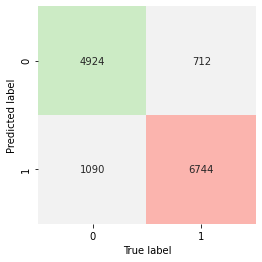

In [55]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = model.predict(test_Tfidf)
cm = confusion_matrix(y_test, pred)
cm
_, ax = plt.subplots()

sns.heatmap(cm.T,
            square=True,
            annot=True,
            fmt='d',
            cmap='Pastel1_r',
            cbar=False,
            ax=ax)

ax.set(xlabel='True label', ylabel='Predicted label');

The correct predictions are much higher than the uncorrect ones.

As we see the accuracy is pretty high, lets use some fake movie reviews to factually check. 

In [14]:
# very short and fake movie reviews
reviews_new = ['This movie was excellent', 'Absolute joy ride', 
            'Bruce Willis was terrible', 'Arnold at his best.', 
              'This was indeed a movie', 'Two thumbs up', 'I fell asleep halfway through', 
              "We can't wait for the sequel!!", 'great', 'Bad just bad', 'I cannot recommend this highly enough', 
              'instant classic.', 'Steven Seagal was amazing. His performance was Oscar-worthy.']

reviews_new_counts = count_data_tfidf.transform(reviews_new)         # turn text into count vector


In [20]:
# have classifier make a prediction
pred = model.predict(reviews_new_counts)

In [21]:
# print out results
test = ['neg' , 'pos']
for review, category in zip(reviews_new, pred):
    if category == 1:    
        print('%r => %s' % (review, test[1]))
    if category == 0:    
        print('%r => %s' % (review, test[0]))
    

'This movie was excellent' => pos
'Absolute joy ride' => pos
'Bruce Willis was terrible' => neg
'Arnold at his best.' => pos
'This was indeed a movie' => neg
'Two thumbs up' => pos
'I fell asleep halfway through' => neg
"We can't wait for the sequel!!" => neg
'great' => pos
'Bad just bad' => neg
'I cannot recommend this highly enough' => pos
'instant classic.' => pos
'Steven Seagal was amazing. His performance was Oscar-worthy.' => pos


Not bad the only one it couldn't predit wasn't clear enough to extract the sentiment.

Lets now try different Text vectorizing method with different parameters to compare and contrast them. This process is called _ablation study_

In [71]:

vectorizers = {
    'Bag of words':                                   CountVectorizer(max_features=10000),
    'Bag of words with stop words':                   CountVectorizer(stop_words="english",
                                                                     max_features=10000),
    'Bag of words with stop words and (1, 2) grams':  CountVectorizer(stop_words="english",
                                                                      ngram_range=(1,2),
                                                                      max_features=10000),
    'Bag of words with stop words and (1, 2)' 
    ' grams and preprocess':                          CountVectorizer(stop_words="english",
                                                                      ngram_range=(1,2),
                                                                      preprocessor=preprocess_text,
                                                                      max_features=10000),
    'TF-IDF':                                         TfidfVectorizer(max_features=10000),
    'TF-IDF w/stop words':                            TfidfVectorizer(stop_words="english",
                                                                     max_features=10000),

    'TF-IDF w/stop words, (1, 2)-grams':              TfidfVectorizer(stop_words="english", 
                                                                      ngram_range=(1,2),
                                                                     max_features=10000),
    'TF-IDF with stop words and (1, 2)' 
    ' grams and preprocess':                          TfidfVectorizer(stop_words="english",
                                                                      ngram_range=(1,2),
                                                                      preprocessor=preprocess_text,
                                                                      max_features=10000),

}
train_list = []
test_list = []
for description, vectorizer in vectorizers.items():

    vectorizer.fit(x_train)
    

    train = vectorizer.transform(x_train)
    test = vectorizer.transform(x_test)
    

    model = MultinomialNB(alpha=0.1).fit(train, y_train)

    print(f'\n{description}\n')
    
    print("- Number of features: {:6d}".format(len(vectorizer.get_feature_names())))
    train_list.append(model.score(train, y_train))
    test_list.append(model.score(test, y_test))
    print("- Training accuracy:  {:.2%}".format(model.score(train, y_train)))
    print("- Test accuracy:      {:.2%}".format(model.score(test, y_test)))


Bag of words

- Number of features:  10000
- Training accuracy:  88.85%
- Test accuracy:      86.89%

Bag of words with stop words

- Number of features:  10000
- Training accuracy:  88.20%
- Test accuracy:      86.09%

Bag of words with stop words and (1, 2) grams

- Number of features:  10000
- Training accuracy:  85.80%
- Test accuracy:      83.82%

Bag of words with stop words and (1, 2) grams and preprocess

- Number of features:  10000
- Training accuracy:  85.82%
- Test accuracy:      83.90%

TF-IDF

- Number of features:  10000
- Training accuracy:  90.10%
- Test accuracy:      87.28%

TF-IDF w/stop words

- Number of features:  10000
- Training accuracy:  89.29%
- Test accuracy:      86.52%

TF-IDF w/stop words, (1, 2)-grams

- Number of features:  10000
- Training accuracy:  86.95%
- Test accuracy:      84.66%

TF-IDF with stop words and (1, 2) grams and preprocess

- Number of features:  10000
- Training accuracy:  86.90%
- Test accuracy:      84.69%


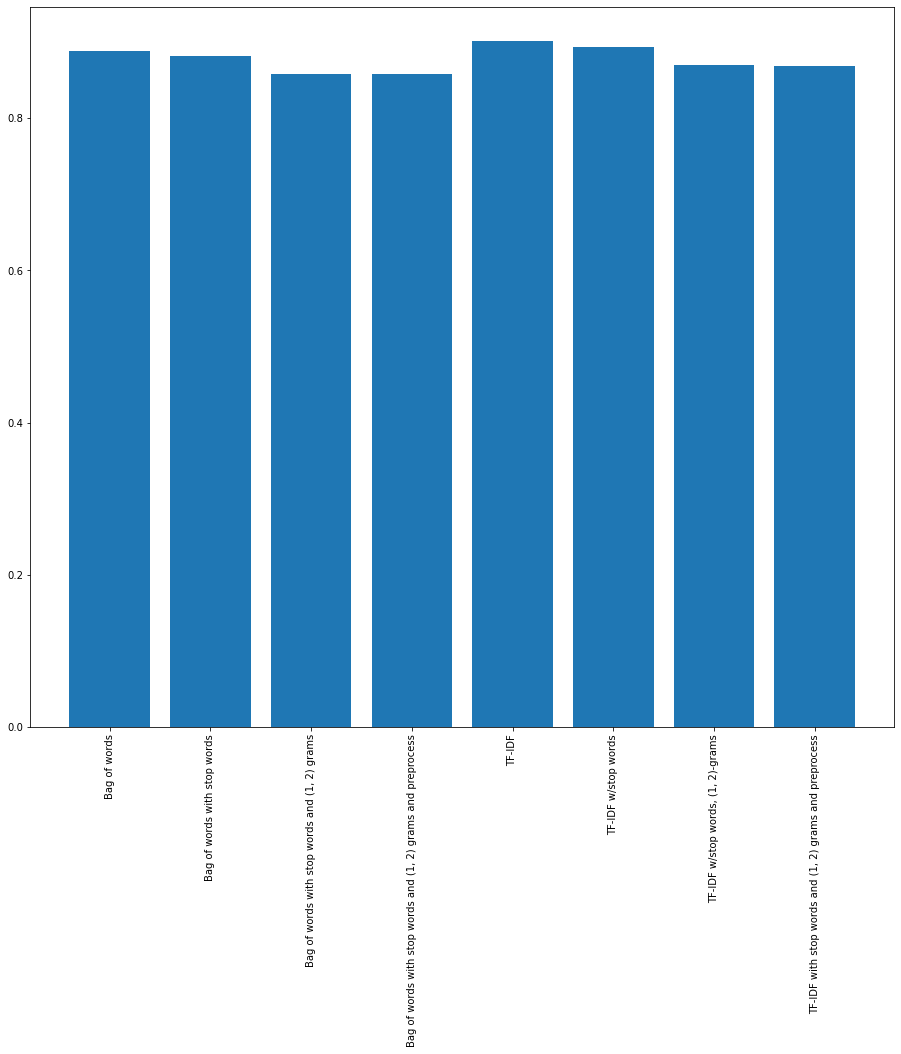

In [81]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 10))

ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(vectorizers.keys(),train_list)

plt.show()

Suprizing result:
As we explained earlier TF-IDF is clearly better than bag of words for this task, but its seems like the highest accuracy rate is achieved without passing any parameter to the text vectorizer in all cases. 
Unlike what the previous experiments showed a passsing the data through a preprossor before vectorizing it actually lowers the accuracy 

From the present result we can conculde 
- that in this case the naive assumptuion actually match the data which is a rare case.
- we have a very well sperated categories in our classification might be the reason why we have such accurate results,in the sentiment analysis case the model complexity seems less important

### Logic regression implementation 

We will now move to the training of our second model, Logic regression,despite the name, its a model used for classification,  its a good model for sentiment analysis because it trains quickly even on large datasets and provides very robust results. It's also highly compatible with TF-IDF.

In [96]:
from sklearn.linear_model import LogisticRegression
train = count_data_tfidf.transform(x_train)
test = count_data_tfidf.transform(x_test)
clf = LogisticRegression(max_iter= 300)#increasing the max iter parameter is essential because of the size of our training data
clf = clf.fit(train, y_train)

In [44]:
print("- Training accuracy:  {:.2%}".format(clf.score(train, y_train)))
print("- Test accuracy:      {:.2%}".format(clf.score(test, y_test)))

- Training accuracy:  90.41%
- Test accuracy:      87.15%


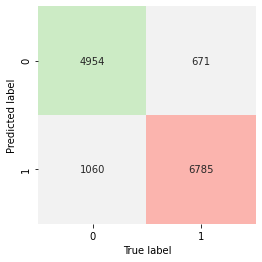

In [45]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = clf.predict(test)
cm = confusion_matrix(y_test, pred)
cm
_, ax = plt.subplots()

sns.heatmap(cm.T,
            square=True,
            annot=True,
            fmt='d',
            cmap='Pastel1_r',
            cbar=False,
            ax=ax)

ax.set(xlabel='True label', ylabel='Predicted label');

A slightly better result than multinomial bayes

As expected the accuracy is higher than Multinomial Naive Bayes implementation, it proves its compatibility with TF-IDF

Lets do the ablation study for that model

In [86]:

vectorizers = {
    'Bag of words':                                   CountVectorizer(max_features=10000),
    'Bag of words with stop words':                   CountVectorizer(stop_words="english",
                                                                     max_features=10000),
    'Bag of words with stop words and (1, 2) grams':  CountVectorizer(stop_words="english",
                                                                      ngram_range=(1,2),
                                                                      max_features=10000),
    'Bag of words with stop words and (1, 2)' 
    ' grams and preprocess':                          CountVectorizer(stop_words="english",
                                                                      ngram_range=(1,2),
                                                                      preprocessor=preprocess_text,
                                                                      max_features=10000),
    'TF-IDF':                                         TfidfVectorizer(max_features=10000),
    'TF-IDF w/stop words':                            TfidfVectorizer(stop_words="english",
                                                                     max_features=10000),

    'TF-IDF w/stop words, (1, 2)-grams':              TfidfVectorizer(stop_words="english", 
                                                                      ngram_range=(1,2),
                                                                     max_features=10000),
    'TF-IDF with stop words and (1, 2)' 
    ' grams and preprocess':                          TfidfVectorizer(stop_words="english",
                                                                      ngram_range=(1,2),
                                                                      preprocessor=preprocess_text,
                                                                      max_features=10000),

}
train_list = []
test_list = []
for description, vectorizer in vectorizers.items():

    # Create the vocabulary based on the training data
    vectorizer.fit(x_train)
    
    # Encode the words in the training and test dataset based on the vocabulary
    train = vectorizer.transform(x_train)
    test = vectorizer.transform(x_test)
    
    # Train the classifier
    clf = LogisticRegression(max_iter= 300).fit(train, y_train)

    print(f'\n{description}\n')
    train_list.append(clf.score(train, y_train))
    test_list.append(clf.score(test, y_test))
    print("- Number of features: {:6d}".format(len(vectorizer.get_feature_names())))

    print("- Training accuracy:  {:.2%}".format(clf.score(train, y_train)))
    print("- Test accuracy:      {:.2%}".format(clf.score(test, y_test)))


Bag of words

- Number of features:  10000
- Training accuracy:  92.69%
- Test accuracy:      88.96%

Bag of words with stop words

- Number of features:  10000
- Training accuracy:  91.50%
- Test accuracy:      87.84%

Bag of words with stop words and (1, 2) grams

- Number of features:  10000
- Training accuracy:  89.62%
- Test accuracy:      86.00%

Bag of words with stop words and (1, 2) grams and preprocess

- Number of features:  10000
- Training accuracy:  89.59%
- Test accuracy:      86.09%

TF-IDF

- Number of features:  10000
- Training accuracy:  91.33%
- Test accuracy:      88.29%

TF-IDF w/stop words

- Number of features:  10000
- Training accuracy:  90.38%
- Test accuracy:      87.25%

TF-IDF w/stop words, (1, 2)-grams

- Number of features:  10000
- Training accuracy:  88.63%
- Test accuracy:      85.46%

TF-IDF with stop words and (1, 2) grams and preprocess

- Number of features:  10000
- Training accuracy:  88.63%
- Test accuracy:      85.57%


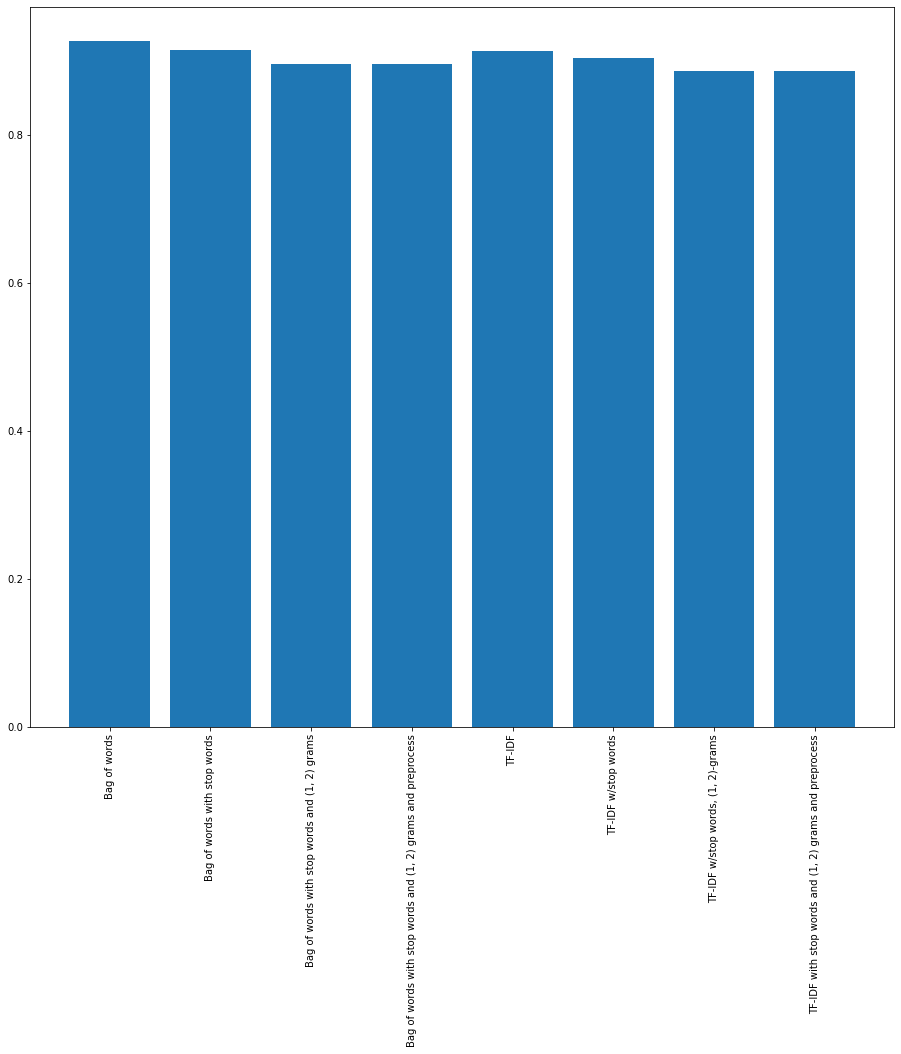

In [94]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 10))

ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(vectorizers.keys(),train_list)

plt.show()

We have a similar result as multimomial bayes model, tf idf gives the highest accuracy, but overall logical regression is the superior method .

In [85]:
train_list

[0.5081571669852818,
 0.49861727203548695,
 0.5388184635943503,
 0.8691141260973663,
 0.5091408526513113,
 0.5025334545926985,
 0.535440524137419,
 0.8690398856697414]

Lets pass it through our fake movie reviews for a last check. 

In [51]:
# very short and fake movie reviews
reviews_new = ['This movie was excellent', 'Absolute joy ride', 
            'Bruce Willis was terrible', 'Arnold at his best.', 
              'This was indeed a movie', 'Two thumbs up', 'I fell asleep halfway through', 
              "We can't wait for the sequel!!", 'great', 'Bad just bad', 'I cannot recommend this highly enough', 
              'instant classic.', 'Steven Seagal was amazing. His performance was Oscar-worthy.']

reviews_new_counts = count_data_tfidf.transform(reviews_new)         # turn text into count vector


In [87]:
# have classifier make a prediction
pred = clf.predict(reviews_new_counts)

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [53]:
# print out results
test = ['neg' , 'pos']
for review, category in zip(reviews_new, pred):
    if category == 1:    
        print('%r => %s' % (review, test[1]))
    if category == 0:    
        print('%r => %s' % (review, test[0]))
    

'This movie was excellent' => pos
'Absolute joy ride' => pos
'Bruce Willis was terrible' => neg
'Arnold at his best.' => pos
'This was indeed a movie' => neg
'Two thumbs up' => pos
'I fell asleep halfway through' => neg
"We can't wait for the sequel!!" => neg
'great' => pos
'Bad just bad' => neg
'I cannot recommend this highly enough' => pos
'instant classic.' => pos
'Steven Seagal was amazing. His performance was Oscar-worthy.' => pos


The exact same result as the bayes model, it is not suprising as they have similar accuracy scores 

- Linear regression proves to be a really good model for a sentiment analysis because its a linear problem and this model is linear decision surface,unfortunately, linearly seperated data is rarely found in real word scenarios.
- with more complicated problems it will be tough to obtain complex relationship using this model, an algorithm such a neural network will easily outperform it.  

We will now apply our trained linear regression model to predict the sentiment present in the test dataset.

In [92]:
test['sentiment'] = clf.predict(count_data_tfidf.transform(test.sentence))

In [93]:
test

,index,sentence,sentiment
0,0,uneasy mishmash of styles and genres .,0
1,1,this film 's relationship to actual tension is...,1
2,2,"by the end of no such thing the audience , lik...",1
3,3,director rob marshall went out gunning to make...,1
4,4,lathan and diggs have considerable personal ch...,0
...,...,...,...
1816,1816,"it risks seeming slow and pretentious , becaus...",1
1817,1817,take care of my cat offers a refreshingly diff...,1
1818,1818,davis has filled out his cast with appealing f...,1
1819,1819,it represents better-than-average movie-making...,0


### Exploring further

The models described have proven to be highly accurate for our sentiment analysis with almost 90% accuracy using the training split, I want to see if we can get different result using a third model. 

The model we will exlore is Multilayer perceptron, it's a supervised learning algorithm, it cal learn a non linear function approximator for eaither classification or regression, It's different from logistic regression in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. 

In [48]:
from sklearn.neural_network import MLPClassifier
clfMLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)
clfMLP = clfMLP.fit(train, y_train)
print("- Training accuracy:  {:.2%}".format(clfMLP.score(train, y_train)))
print("- Test accuracy:      {:.2%}".format(clfMLP.score(test, y_test)))


- Training accuracy:  55.89%
- Test accuracy:      55.35%


Suprinsingly this model performs relatively well,admittedly,  I was expecting a much lower accuracy score because this model is mostly used for image recognition and computer vision.

## Get the best Hyper parameter for our model

For each model we have a certain number of parameter we can tune to get better results. lets look at the hyper parameteres for the models we used. 

In [53]:
models = {
    
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression' : LogisticRegression(),
    'Multilayer perceptron' : MLPClassifier()
}

for name, x in models.items():
    print(f'{name} hyper-parameters\n')
    params = x.get_params()
    for param, default in params.items():
        print(f'... {param:25s}: {default}')
    print()

Multinomial Naive Bayes hyper-parameters

... alpha                    : 1.0
... class_prior              : None
... fit_prior                : True

Logistic Regression hyper-parameters

... C                        : 1.0
... class_weight             : None
... dual                     : False
... fit_intercept            : True
... intercept_scaling        : 1
... l1_ratio                 : None
... max_iter                 : 100
... multi_class              : auto
... n_jobs                   : None
... penalty                  : l2
... random_state             : None
... solver                   : lbfgs
... tol                      : 0.0001
... verbose                  : 0
... warm_start               : False

Multilayer perceptron hyper-parameters

... activation               : relu
... alpha                    : 0.0001
... batch_size               : auto
... beta_1                   : 0.9
... beta_2                   : 0.999
... early_stopping           : False
... epsilon      

Except for multinomial Bayes, it seems like we have a lot of parameters to tune, the best way to achieve this is through the use of the GridSearchCV from sklearn, we give it a list of parameters then it will try each one and define the best parameter for our model in term of accuracy. 

#### Multinomial Bayes hyper parameters fine tuning

In [56]:
from sklearn.model_selection import GridSearchCV
parametersMB = {
    'alpha': [0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1],
    'fit_prior':[True, False]
}
gsMB = GridSearchCV(model, parametersMB, cv=10)
gsMB.fit(train_Tfidf, y_train)

GridSearchCV(cv=10, estimator=MultinomialNB(alpha=0.1),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1],
                         'fit_prior': [True, False]})

In [58]:
print(f'the best parameter for multinomial bayes is {gsMB.best_params_}')

the best parameter for multinomial bayes is {'alpha': 0.1, 'fit_prior': True}


Lets apply those parameters to our model

In [103]:
from sklearn.naive_bayes import MultinomialNB


# Train the classifier
model = MultinomialNB(alpha = 0.1, fit_prior = 'true')

train_Tfidf = count_data_tfidf.transform(x_train)
test_Tfidf =count_data_tfidf.transform(x_test)

model.fit(train_Tfidf, y_train)
#print("Number of features: {:6d}".format(len(count_data_tfidf.get_feature_names())))

print("Training accuracy:  {:.2%}".format(model.score(train_Tfidf, y_train)))
print("Test accuracy:      {:.2%}".format(model.score(test_Tfidf, y_test)))

Training accuracy:  89.34%
Test accuracy:      86.62%


Same result as we did apply the same parameters when we first trained our model, this is not suprinsing as naive bayes is a simple and straighforward model. 

#### Logic regression hyper parameters fine tuning

In [97]:
import numpy as np 
parametersLG =  [    
                    {'C' : np.logspace(-4, 4, 20),
                    'solver' : ['lbfgs','newton-cg'],
                    
                    
    }
]
gsLG = GridSearchCV(clf, 
                    parametersLG,
                    scoring = 'accuracy',
                    cv=5,
                   verbose=0)
gsLG.fit(train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'solver': ['lbfgs', 'newton-cg']}],
             scoring='accuracy')

Despite having an important number of parameter to tune I find that it is almost impossible to apply the Gridsearch to all of them, the reason being the computation power necessary is too important for my current hardware, despite leaving it runing for 4 hours it still didn't return any result, therefor I am limiting myself to only 2 parameters.

In [98]:
print(f'the best parameter for multinomial bayes is {gsLG.best_params_}')

the best parameter for multinomial bayes is {'C': 29.763514416313132, 'solver': 'lbfgs'}


Same for Logistic regression

In [102]:
from sklearn.linear_model import LogisticRegression
train = count_data_tfidf.transform(x_train)
test = count_data_tfidf.transform(x_test)
clf = LogisticRegression( max_iter = 1000,C=29.76, solver = 'lbfgs')#increasing the max iter parameter is essential because of the size of our training data
clf = clf.fit(train, y_train)
print("- Training accuracy:  {:.2%}".format(clf.score(train, y_train)))
print("- Test accuracy:      {:.2%}".format(clf.score(test, y_test)))

- Training accuracy:  93.51%
- Test accuracy:      88.41%


We did in fact have a 3% increase.

hyper parameter tuning is a really important step when training model as it can greatly increase the accuracy, as we can see the more a parameters a model have the higher the accuracy increases also we should keep in mind that depending on the model we choose we need to be really careful on what hyper parameters we decide de tune, as it might require too much computational power.

### Ethical implications 

To conclude, I find it fascinating how accurate some of the result obtained where, nonetheless, I think there are problematic implication related to it. When you classify human emotion expressed through written review, the depth of complexity of the human emotional spectrum is lost, admittedly, this kind of classification have a commercial value, It will greatly help the marketing teams of movies to better tune their future product and they will certainly, get great results, but personaly I think filmaking is one of the greatest art form and this is will impact negatively on the quality of the movie production. 